In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
import sys
sys.path.append('..')
from tools.processing import get_region_by_province_name

saving_water = pd.read_excel("../data/saving_water.xlsx")
saving_water['Region'] = saving_water['Province'].apply(get_region_by_province_name)
saving_water.head()

,Province,Irrigated area,Channel lining,Pipeline water,Sprinkler irrigation,Drip irrigation,Region
0,Qinghai,273.39,74.31,0.00,2.00,0.00,SR
1,Sichuan,0.55,0.00,0.41,0.00,0.00,SR
2,Gansu,763.26,375.80,32.36,34.98,10.86,UR
3,Ningxia,668.88,169.10,19.70,11.63,6.70,UR
4,Neimeng,1558.77,427.28,212.03,25.96,2.45,UR


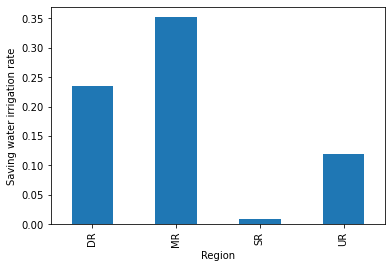

In [7]:
# 按区域进行加和
sw_region = saving_water.groupby("Region").sum()

# 计算每个区域的节水率
sw_region['Rate'] = sw_region.iloc[:, 2:].sum(axis=1) / sw_region['Irrigated area']

fig, ax = plt.subplots()
sw_region['Rate'].plot.bar(ax=ax)
ax.set_xlabel("Region")
ax.set_ylabel("Saving water irrigation rate")

plt.savefig('../figures/supplementary_information/saving_water.jpg', dpi=300)
plt.savefig('../figures/supplementary_information/saving_water.pdf', dpi=300)
plt.show();